### MACHINE LEARNING PROJECT : CONSUMER COMPLAINT RESOLUTION ANALYSIS 

Data Description : We are dealing with a customers review data, where the target variable is "Consumer Disputed?" in the testing data and "Dispute" in the training data, that indicates whether a customer has issues with the bank or not.

#### IMPORT LIBRARIES

In [1]:
#Loading the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, r2_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from io import StringIO
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

#### IMPORTING THE DATA

In [3]:
train_data = pd.read_csv("Consumer_Complaints_train.csv")
test_data = pd.read_csv("Consumer_Complaints_test.csv")

#### EXPLORATORY DATA ANALYSIS

In [4]:
print("shape of the training data: ", train_data.shape)
print("shape of the testing data: ", test_data.shape)

shape of the training data:  (358810, 18)
shape of the testing data:  (119606, 17)


In [5]:
train_data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [6]:
test_data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [7]:
train_data.duplicated().sum()

0

In [8]:
test_data.duplicated().sum()

0

In [9]:
train_data.isnull().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [10]:
test_data.isnull().sum()

Date received                        0
Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company                              0
State                              936
ZIP code                           937
Tags                            102629
Consumer consent provided?       85699
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
dtype: int64

Dropping the columns of the data, in which the null values are more than 25%

In [11]:
len(test_data)

119606

In [12]:
for i in test_data.columns:
    if (test_data[i].isnull().sum())/len(test_data) >= 0.25:
        test_data = test_data.drop(i, axis = 1)

In [13]:
test_data.shape

(119606, 11)

In [14]:
test_data.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [15]:
for i in train_data.columns:
    if (train_data[i].isnull().sum())/len(test_data) >= 0.25:
        train_data = train_data.drop(i, axis = 1)

In [16]:
train_data.shape

(358810, 12)

In [17]:
train_data.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [18]:
test_data.isnull().sum()

Date received                     0
Product                           0
Issue                             0
Company                           0
State                           936
ZIP code                        937
Submitted via                     0
Date sent to company              0
Company response to consumer      0
Timely response?                  0
Complaint ID                      0
dtype: int64

In [19]:
train_data.isnull().sum()

Date received                      0
Product                            0
Issue                              0
Company                            0
State                           2903
ZIP code                        2911
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Timely response?                   0
Consumer disputed?                 0
Complaint ID                       0
dtype: int64

In [20]:
train_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [21]:
test_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667


In [22]:
test_data["Date received"] = pd.to_datetime(test_data["Date received"])
train_data["Date received"] = pd.to_datetime(train_data["Date received"])

In [23]:
test_data["month"] = test_data["Date received"].dt.month
test_data["day"] = test_data["Date received"].dt.day
test_data["year"] = test_data["Date received"].dt.year

In [24]:
train_data["month"] = train_data["Date received"].dt.month
train_data["day"] = train_data["Date received"].dt.day
train_data["year"] = train_data["Date received"].dt.year

In [25]:
test_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,month,day,year
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,1,17,2015
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,6,22,2016
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,9,4,2015
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,5,17,2016
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,7,7,2016


In [26]:
train_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,month,day,year
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,10,14,2015
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,4,26,2015
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,12,20,2013
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,1,30,2015


In [27]:
train_data["Date sent to company"] = pd.to_datetime(train_data["Date sent to company"])
test_data["Date sent to company"] = pd.to_datetime(test_data["Date sent to company"])

In [28]:
train_data["Days_Held"] = (train_data["Date sent to company"] - train_data["Date received"])

In [29]:
train_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,month,day,year,Days_Held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,10,14,2015,0 days
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,4,26,2015,0 days
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,12,20,2013,14 days
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016,1 days
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,1,30,2015,0 days


In [30]:
test_data["Days_Held"] = (test_data["Date sent to company"] - test_data["Date received"])

In [31]:
test_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,month,day,year,Days_Held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,1,17,2015,0 days
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,6,22,2016,0 days
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,9,4,2015,0 days
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,5,17,2016,3 days
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,7,7,2016,0 days


In [32]:
test_data = test_data.drop(["Date received", "Complaint ID","Date sent to company", "ZIP code"], axis = 1)

In [33]:
train_data = train_data.drop(["Date received", "Complaint ID","Date sent to company", "ZIP code"], axis = 1)

In [34]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,month,day,year,Days_Held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,10,14,2015,0 days
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,26,2015,0 days
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,12,20,2013,14 days
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1 days
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,30,2015,0 days


In [35]:
lb = LabelEncoder()

lb.fit(train_data["State"])
train_data["State"] = lb.transform(train_data["State"])

lb.fit(test_data["State"])
test_data["State"] = lb.transform(test_data["State"])

In [36]:
test_data["State"].fillna(value = test_data["State"].mode())
train_data["State"].fillna(value = train_data["State"].mode())

0         15
1         15
2         50
3         43
4          8
          ..
358805    45
358806    43
358807    53
358808    13
358809    13
Name: State, Length: 358810, dtype: int32

In [37]:
train_data.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
month                           0
day                             0
year                            0
Days_Held                       0
dtype: int64

In [38]:
test_data.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
month                           0
day                             0
year                            0
Days_Held                       0
dtype: int64

In [39]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,month,day,year,Days_Held
0,Credit reporting,Incorrect information on credit report,Equifax,15,Web,Closed with explanation,Yes,No,10,14,2015,0 days
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,15,Web,Closed with explanation,Yes,Yes,4,26,2015,0 days
2,Credit card,Other,Citibank,50,Phone,Closed with non-monetary relief,Yes,No,12,20,2013,14 days
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",43,Referral,Closed with explanation,Yes,No,3,3,2016,1 days
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",8,Web,Closed with explanation,Yes,Yes,1,30,2015,0 days


In [40]:
test_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,month,day,year,Days_Held
0,Credit card,Customer service / Customer relations,Citibank,53,Web,Closed with monetary relief,Yes,1,17,2015,0 days
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",53,Phone,Closed with explanation,Yes,6,22,2016,0 days
2,Credit card,Credit line increase/decrease,Capital One,35,Web,Closed with explanation,Yes,9,4,2015,0 days
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",31,Web,Closed with non-monetary relief,Yes,5,17,2016,3 days
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",50,Web,Closed with explanation,Yes,7,7,2016,0 days


In [41]:
Week_Received = []

for i in train_data["day"]:
    if i>=1 and i<=7:
        Week_Received.append(1)
    if i>=8 and i<=14:
        Week_Received.append(2)
    if i>=15 and i<=21:
        Week_Received.append(3)
    if i>=22 and i<=28:
        Week_Received.append(4)
    else:
        Week_Received.append(5)
    
train_data["Week Received"] = pd.Series(Week_Received)

In [42]:
Week_Received = []

for i in test_data["day"]:
    if i>=1 and i<=7:
        Week_Received.append(1)
    if i>=8 and i<=14:
        Week_Received.append(2)
    if i>=15 and i<=21:
        Week_Received.append(3)
    if i>=22 and i<=28:
        Week_Received.append(4)
    else:
        Week_Received.append(5)
    
test_data["Week Received"] = pd.Series(Week_Received)

In [43]:
test_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,month,day,year,Days_Held,Week Received
0,Credit card,Customer service / Customer relations,Citibank,53,Web,Closed with monetary relief,Yes,1,17,2015,0 days,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",53,Phone,Closed with explanation,Yes,6,22,2016,0 days,5
2,Credit card,Credit line increase/decrease,Capital One,35,Web,Closed with explanation,Yes,9,4,2015,0 days,4
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",31,Web,Closed with non-monetary relief,Yes,5,17,2016,3 days,1
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",50,Web,Closed with explanation,Yes,7,7,2016,0 days,5


In [44]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,month,day,year,Days_Held,Week Received
0,Credit reporting,Incorrect information on credit report,Equifax,15,Web,Closed with explanation,Yes,No,10,14,2015,0 days,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,15,Web,Closed with explanation,Yes,Yes,4,26,2015,0 days,5
2,Credit card,Other,Citibank,50,Phone,Closed with non-monetary relief,Yes,No,12,20,2013,14 days,4
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",43,Referral,Closed with explanation,Yes,No,3,3,2016,1 days,3
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",8,Web,Closed with explanation,Yes,Yes,1,30,2015,0 days,5


In [45]:
train_data["Issue"].nunique()

95

In [46]:
train_data["Product"].nunique()

12

## DATA VISUALISATION 

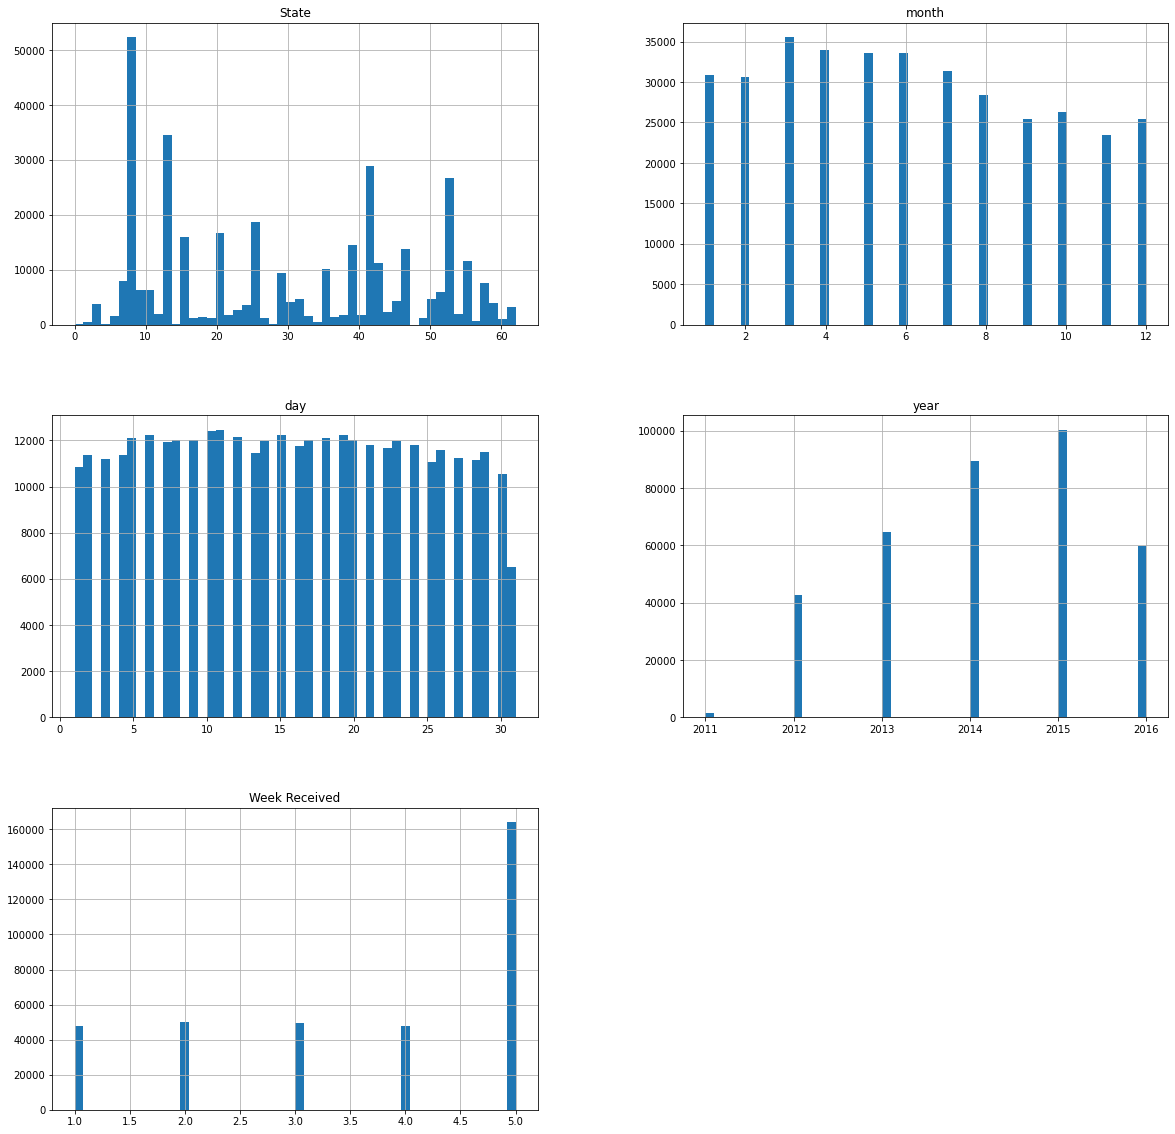

In [47]:
train_data.hist(bins = 50, figsize = (20,20))
plt.show()

INFERENCES : 

1. The state wuth index 6 generates the most number of disputes.
2. The month of March sees an extreme rise in the number of disputes, and then sees a dip till September, followed by a rise in  October.
3. The number of disputes have been seeing rise since 2011 (huge increase from 2011 to 2012), and then a huge dip in 2016.
4. The last week of the month sees the most number of complaints/disputes

C:\Users\Diya Sivaprasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


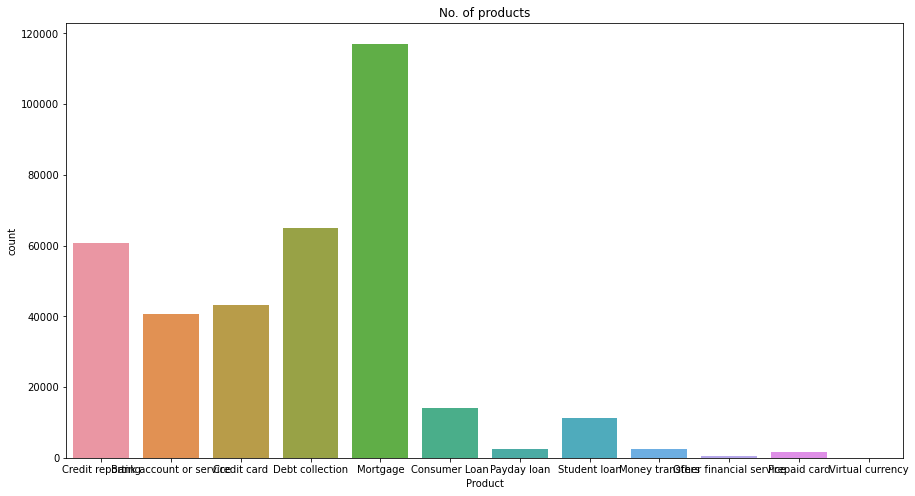

In [48]:
plt.figure(figsize = (15,8))
sns.countplot(train_data["Product"])
plt.title("No. of products")
plt.show()

In [49]:
issue_data = pd.DataFrame(train_data["Issue"].value_counts().sort_values(ascending = False).head(6))
issue_data

,Issue
"Loan modification,collection,foreclosure",60185
Incorrect information on credit report,43825
"Loan servicing, payments, escrow account",38456
Cont'd attempts collect debt not owed,27266
"Account opening, closing, or management",17557
Disclosure verification of debt,12283


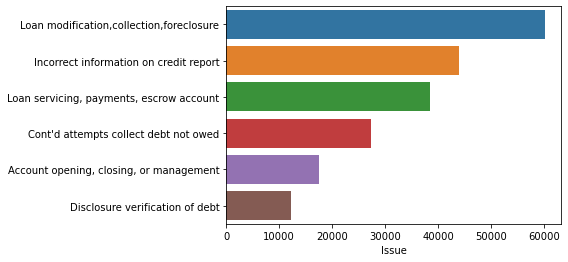

In [50]:
plt.figure()
sns.barplot(x = "Issue", y = issue_data.index , data = issue_data)
plt.show()

In [51]:
train_data["State"].nunique()

63

In [52]:
state_data = pd.DataFrame(train_data["State"].value_counts().sort_values(ascending = False).head(10))
state_data

,State
8,52368
13,34567
53,26683
42,24554
15,15886
39,14571
46,12834
20,12745
55,11645
26,11456


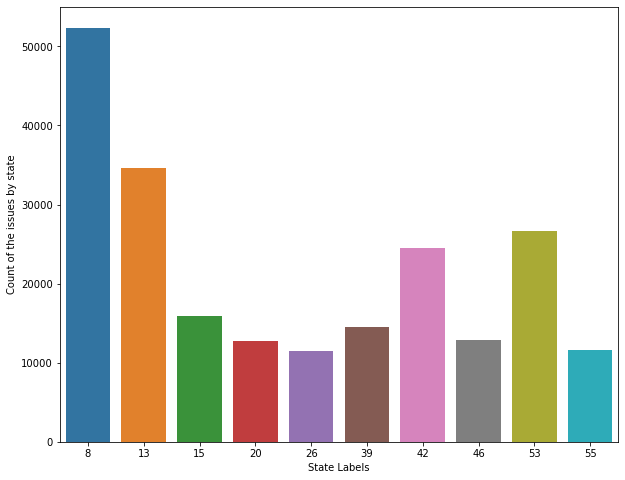

In [53]:
plt.figure(figsize = (10,8))
sns.barplot(x = state_data.index, y = "State", data = state_data)
plt.xlabel("State Labels")
plt.ylabel("Count of the issues by state")
plt.show()

INFERENCE : The state with the label 8 generates the most number of complaints, followed by 13, 53 and 42

In [54]:
train_data["Submitted via"].unique()

array(['Web', 'Phone', 'Referral', 'Postal mail', 'Fax', 'Email'],
      dtype=object)

C:\Users\Diya Sivaprasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


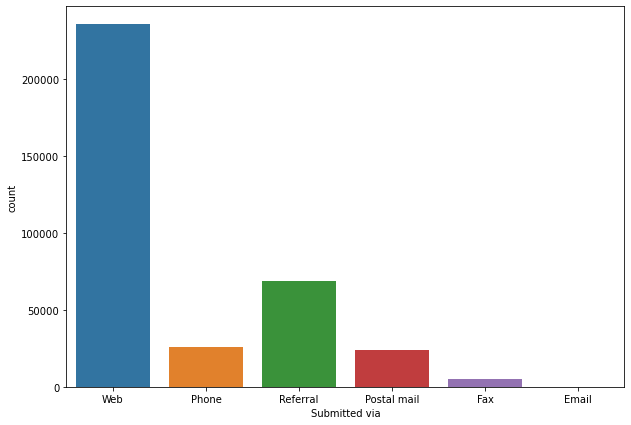

In [55]:
plt.figure(figsize = (10,7))
sns.countplot(train_data["Submitted via"])
plt.show()

INFERENCE : Most people prefer to use "Web" as a platform to register complaints, followed by "Referrals"

In [56]:
train_data["Company response to consumer"].unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed with relief', 'Closed without relief',
       'Closed with monetary relief', 'Closed'], dtype=object)

C:\Users\Diya Sivaprasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


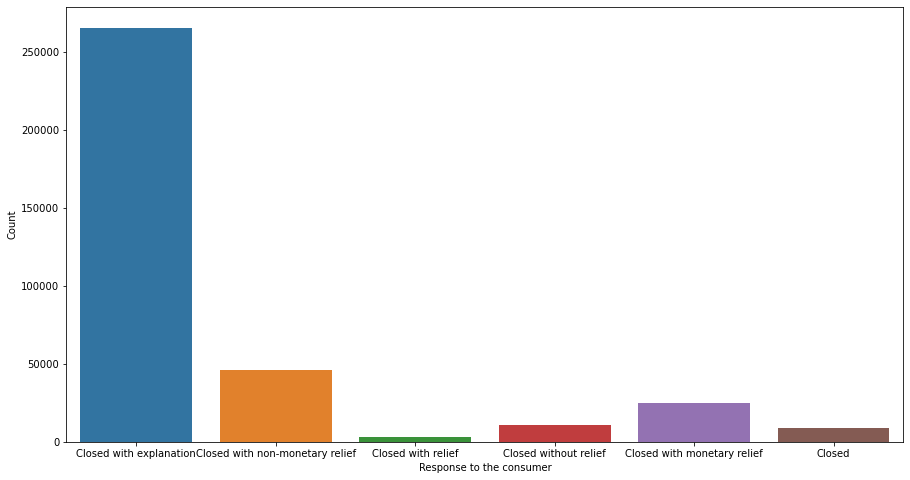

In [57]:
plt.figure(figsize = (15,8))
sns.countplot(train_data["Company response to consumer"])
plt.xlabel("Response to the consumer")
plt.ylabel("Count")
plt.show()

In [58]:
train_data.groupby("Consumer disputed?")["Company response to consumer"].count()

Consumer disputed?
No     282638
Yes     76172
Name: Company response to consumer, dtype: int64

We get the number of customers who are disputed even after company's respone to them

In [59]:
len(train_data[(train_data["Timely response?"] == "Yes")&(train_data["Consumer disputed?"] == "Yes")])

74943

In [60]:
post_resolve_dispute = train_data[(train_data["Timely response?"] == "Yes")&(train_data["Consumer disputed?"] == "Yes")]["Issue"].value_counts().sort_values(ascending = False).head(8)
post_resolve_dispute = pd.DataFrame(post_resolve_dispute)
post_resolve_dispute

,Issue
"Loan modification,collection,foreclosure",13723
"Loan servicing, payments, escrow account",9369
Incorrect information on credit report,7055
Cont'd attempts collect debt not owed,5008
"Account opening, closing, or management",3775
Disclosure verification of debt,2893
"Application, originator, mortgage broker",2291
Deposits and withdrawals,2177


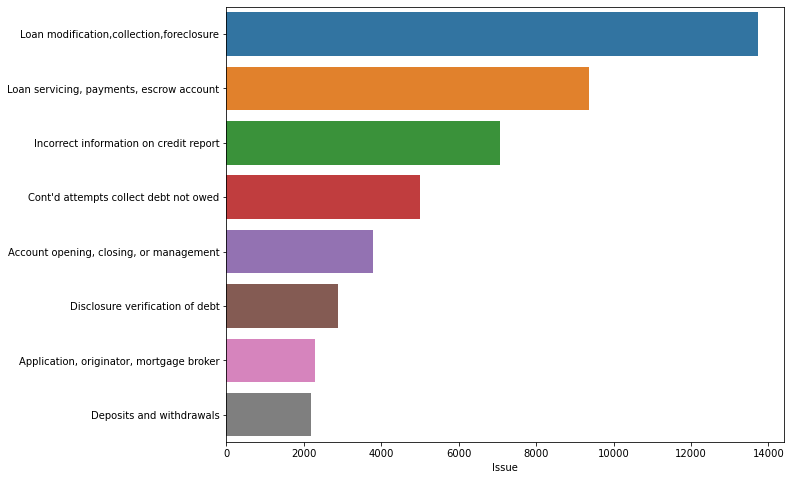

In [61]:
plt.figure(figsize = (10,8))
sns.barplot(x = "Issue", y = post_resolve_dispute.index, data = post_resolve_dispute)
plt.show()

C:\Users\Diya Sivaprasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


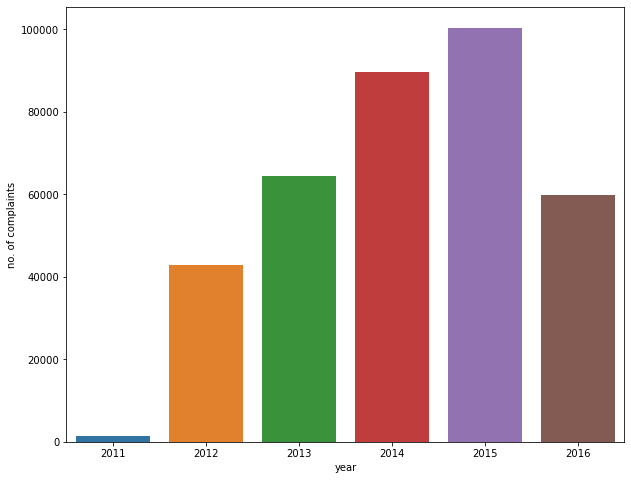

In [62]:
plt.figure(figsize = (10,8))
sns.countplot(train_data["year"])
plt.ylabel("no. of complaints")
plt.show()

In [63]:
train_data["Company"].nunique()

3064

In [64]:
company_data = train_data["Company"].value_counts().sort_values(ascending = False).head(10)
company_data = pd.DataFrame(company_data)

In [65]:
company_data

,Company
Bank of America,34903
Wells Fargo & Company,26490
JPMorgan Chase & Co.,21677
Equifax,21489
Experian,20075
"TransUnion Intermediate Holdings, Inc.",16881
Citibank,16792
Ocwen,13110
Capital One,10082
Nationstar Mortgage,8414


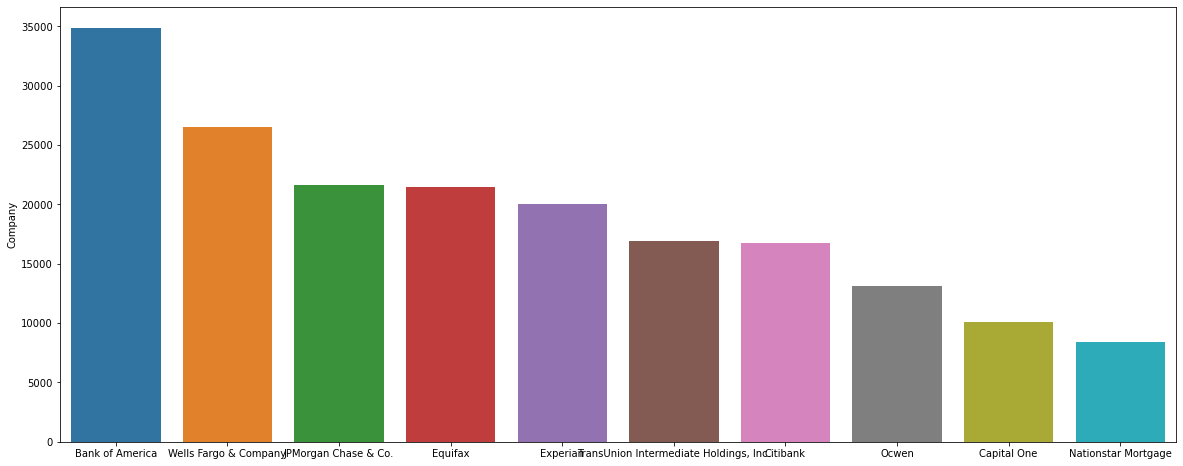

In [66]:
plt.figure(figsize = (20,8))
sns.barplot(x = company_data.index, y = "Company", data = company_data)
plt.show()

## MODEL BUILDING

In [67]:
train_data = train_data.drop(["Company", "State", "Week Received", "Days_Held"], axis = 1)
train_data.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,month,day,year
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,No,10,14,2015
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,Yes,4,26,2015
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,No,12,20,2013
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,No,3,3,2016
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,Yes,1,30,2015


In [68]:
lb = LabelEncoder()

lb.fit(train_data["Submitted via"])
train_data["Submitted via"] = lb.transform(train_data["Submitted via"])

lb.fit(train_data["Timely response?"])
train_data["Timely response?"] = lb.transform(train_data["Timely response?"])

lb.fit(train_data["Consumer disputed?"])
train_data["Consumer disputed?"] = lb.transform(train_data["Consumer disputed?"])

lb.fit(train_data["Company response to consumer"])
train_data["Company response to consumer"] = lb.transform(train_data["Company response to consumer"])

lb.fit(train_data["Product"])
train_data["Product"] = lb.transform(train_data["Product"])

In [69]:
train_data.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,month,day,year
0,3,Incorrect information on credit report,5,1,1,0,10,14,2015
1,0,Deposits and withdrawals,5,1,1,1,4,26,2015
2,2,Other,2,3,1,0,12,20,2013
3,4,Disclosure verification of debt,4,1,1,0,3,3,2016
4,4,Disclosure verification of debt,5,1,1,1,1,30,2015


In [70]:
train_data["Product"].nunique()

12

### CORRELATION ANALYSIS 

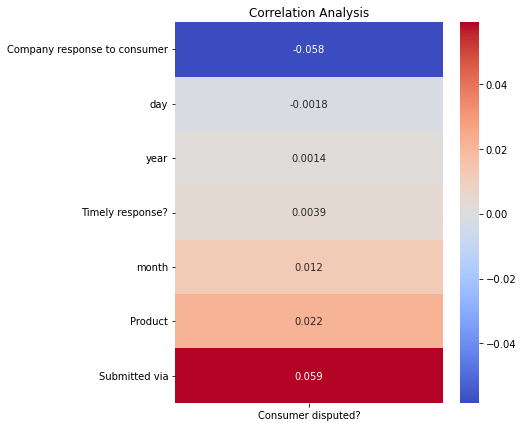

In [71]:
corr = train_data.corr()
target_corr = corr["Consumer disputed?"].drop("Consumer disputed?")
target_corr_sorted = target_corr.sort_values(ascending = True)

plt.figure(figsize = (6,7))
sns.heatmap(target_corr_sorted.to_frame(), annot = True, cmap = "coolwarm")
plt.title("Correlation Analysis")
plt.show()

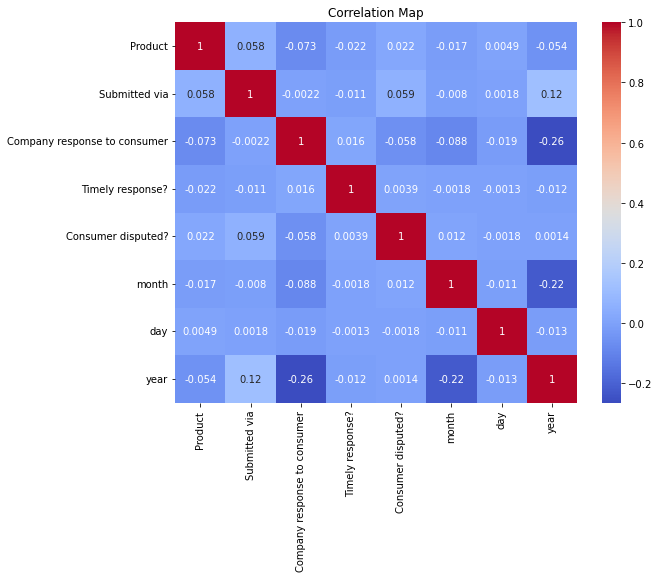

In [72]:
corr_mat = train_data.corr()

plt.figure(figsize = (9,7))
sns.heatmap(corr_mat, annot = True, cmap = "coolwarm")
plt.title("Correlation Map")
plt.show()

##### 1. WITHOUT PCA

#### SEPARATING THE TARGET AND FEATURE VARIABLES 

In [73]:
y = train_data["Consumer disputed?"]  #target variable
x = train_data[["Product", "Submitted via", "Timely response?", "month"]] #feature variable


In [74]:
sc = StandardScaler()
x = sc.fit_transform(x)

#### DIVIDING THE DATASET INTO TRAINING AND TESTING SET

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 40, train_size = 0.8)

#### TESTING THE MODEL PERFORMANCES

In [76]:
from sklearn.metrics import precision_score

In [77]:
def test(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2score = r2_score(y_test, y_pred)
    acc_score = accuracy_score(y_test,y_pred)
    prec_score = precision_score(y_test, y_pred, zero_division = 1)
    
    print(f"{model} Model")
    print("The accuracy score : ", acc_score)
    print("r2 score : ", r2score)
    print("Precision score : ", prec_score)

###### Logistic Regression : 

In [78]:
test(LogisticRegression())

LogisticRegression() Model
The accuracy score :  0.788857612664084
r2 score :  -0.2676558911853033
Precision score :  1.0


##### Decision Tree Classifier : 

In [79]:
test(DecisionTreeClassifier())

DecisionTreeClassifier() Model
The accuracy score :  0.7885510437278782
r2 score :  -0.2694964686408259
Precision score :  0.21052631578947367


##### Random Forest Classifier :

In [80]:
test(RandomForestClassifier())

RandomForestClassifier() Model
The accuracy score :  0.788564978679524
r2 score :  -0.26941280602921114
Precision score :  0.2


##### AdaBoost Classifier : 

In [81]:
test(AdaBoostClassifier())

AdaBoostClassifier() Model
The accuracy score :  0.788857612664084
r2 score :  -0.2676558911853033
Precision score :  1.0


In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
!pip install xgboost

##### XGB Classifier: 

In [90]:
from xgboost import XGBClassifier

In [91]:
test(XGBClassifier())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) Model
The accuracy score :  0.7887461330509183
r2 score :  -0.2683251920782206
Precision score :  0.2777777777777778


##### KNN Classifier : 

In [92]:
test(KNN())

KNeighborsClassifier() Model
The accuracy score :  0.7376745352693627
r2 score :  -0.5749486636459433
Precision score :  0.21380707495714507


Clearly, AdaBoostClassifier gives the maximum accuracy. So clearly, it can be employed for the further prediction process.

##### 2. WITH PCA :

We will perform PCA to reduce the 7 availabel components to 2.

#### IMPORT LIBRARIES FOR PCA

In [94]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components = 2)

In [96]:
principal_comp = pca.fit_transform(x)

In [98]:
princ_df = pd.DataFrame(data = principal_comp, columns = ["pc1","pc2"])
princ_df

,pc1,pc2
0,-0.185602,0.820652
1,-0.641815,-0.566440
2,-2.516243,1.306370
3,-0.058973,-0.817547
4,0.712427,-1.289483
...,...,...
358805,0.221284,-0.582530
358806,0.516427,-0.828273
358807,0.069213,-1.044894
358808,-1.533958,-0.107538


In [99]:
req_df = pd.concat([princ_df, train_data[["Consumer disputed?"]]], axis = 1)

In [101]:
req_df.head()

,pc1,pc2,Consumer disputed?
0,-0.185602,0.820652,0
1,-0.641815,-0.566440,1
2,-2.516243,1.306370,0
3,-0.058973,-0.817547,0
4,0.712427,-1.289483,1


#### VISUALISING THE TRANSFORMATION

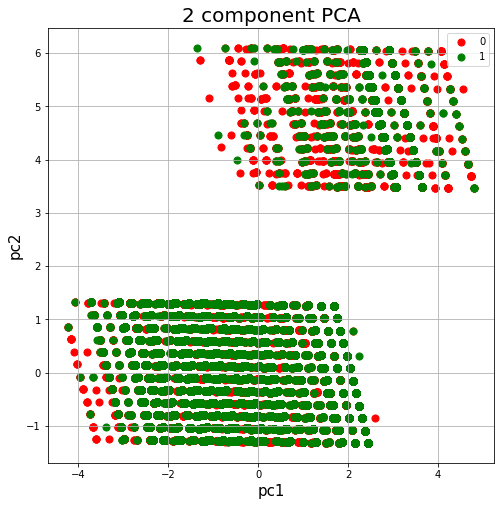

In [115]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = req_df['Consumer disputed?'] == target
    ax.scatter(req_df.loc[indicesToKeep, 'pc1']
               , req_df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### DEFINING THE TARGET AND FEATURE VARIABLES 

In [102]:
x1 = req_df[["pc1","pc2"]]
y1 = req_df["Consumer disputed?"]

#### SPLITTING THE DATASET INTO TRAINING AND TESTING SET

In [103]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, random_state = 60)

#### TESTING THE MODEL PERFORMANCES 

In [104]:
def test(model):
    model.fit(x1_train,y1_train)
    y1_pred = model.predict(x1_test)
    r2score = r2_score(y1_test, y1_pred)
    acc_score = accuracy_score(y1_test,y1_pred)
    prec_score = precision_score(y1_test, y1_pred, zero_division = 1)
    
    print(f"{model} Model")
    print("The accuracy score : ", acc_score)
    print("r2 score : ", r2score)
    print("Precision score : ", prec_score)

##### Logistic Regression

In [105]:
test(LogisticRegression())

LogisticRegression() Model
The accuracy score :  0.7878264262423009
r2 score :  -0.2693151266449696
Precision score :  1.0


##### Decision Tree Classifier

In [106]:
test(DecisionTreeClassifier())

DecisionTreeClassifier() Model
The accuracy score :  0.7876174019676152
r2 score :  -0.2705656012870079
Precision score :  0.2972972972972973


##### Random Forest Classifier

In [107]:
test(RandomForestClassifier())

RandomForestClassifier() Model
The accuracy score :  0.7875895320643237
r2 score :  -0.27073233123927976
Precision score :  0.3023255813953488


##### AdaBoost Classifier

In [108]:
test(AdaBoostClassifier())

AdaBoostClassifier() Model
The accuracy score :  0.7878264262423009
r2 score :  -0.2693151266449696
Precision score :  1.0


##### Gradient Boosting Classifier

In [109]:
test(GradientBoostingClassifier())

GradientBoostingClassifier() Model
The accuracy score :  0.7878264262423009
r2 score :  -0.2693151266449696
Precision score :  1.0


##### KNN Classifier

In [111]:
test(KNN())

KNeighborsClassifier() Model
The accuracy score :  0.7607786850979628
r2 score :  -0.4311265453247206
Precision score :  0.2457427298925858


##### XGB Classifier

In [110]:
test(XGBClassifier())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) Model
The accuracy score :  0.7878124912906552
r2 score :  -0.26939849162110563
Precision score :  0.4444444444444444


Claerly, the AdaBoostClassifier performs the best with the highest accuracy.

In [117]:
from sklearn.metrics import mean_absolute_error

##### Analysing The AdaBoost Classifier

In [119]:
ada = AdaBoostClassifier()
ada.fit(x1_train, y1_train)
y1_pred = ada.predict(x1_test)

acc_score = accuracy_score(y1_test, y1_pred)
mean_abs_err = mean_absolute_error(y1_test,y1_pred)

print("accuracy score : ", acc_score)
print("mean absolute error : ", mean_abs_err)

accuracy score :  0.7878264262423009
mean absolute error :  0.21217357375769907
